In [1]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

liver -> doesn't cluster<br>
artery_aorta -> forms a bigger cluster<br>
lung -> cluster overlaps with artery_aorta <br>
skin_sun_exposed_lower_leg -> clusters <br>
artery_coronary -> clusters with artery_aorta <br>
brain_cortex <br>
brain_cerebellum <br>
adrenal_gland <br>
heart_atrial_appendage <br>
pituitary -> gets divided into 3 clusters <br>
adipose_subcutaneous -> clusters with thyroid <br>
nerve_tibial -> clusters



In [2]:
counts_df = pd.read_csv('./dataCSV/gene_reads_2017-06-05_v8_skin_sun_exposed_lower_leg.csv')
counts_df = counts_df.drop(columns=['id', 'Description']).set_index('Name')
counts_df = counts_df.T
counts_df

Name,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.6,ENSG00000233750.3,...,ENSG00000198886.2,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2
GTEX-111FC-0126-SM-5N9DL,0,252,0,0,0,0,0,1,2,1,...,1227462,0,1,1,274832,90370,36,769375,1,5
GTEX-111VG-2426-SM-5GZXD,0,90,0,0,1,1,0,0,1,6,...,760801,2,1,0,362764,159658,59,386846,0,3
GTEX-1122O-2126-SM-5EGIR,1,109,0,1,0,2,1,0,0,2,...,297730,0,0,1,82187,93295,71,236724,3,0
GTEX-1128S-2326-SM-5GZZY,0,226,0,0,0,0,1,3,4,9,...,1403449,0,0,0,714460,333079,135,778391,4,3
GTEX-113IC-0126-SM-5HL6T,0,169,0,0,0,1,1,0,0,2,...,666278,0,0,1,365130,170416,97,368904,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYT6-0226-SM-5NQ6T,0,125,0,0,0,1,1,0,0,0,...,678384,1,0,0,218579,74576,11,442641,0,0
GTEX-ZYW4-0126-SM-5E44A,0,59,0,1,0,1,0,1,0,2,...,719897,3,0,2,286931,123906,49,336253,3,3
GTEX-ZYY3-0126-SM-5GZY5,0,368,0,0,1,1,1,0,2,2,...,492174,1,2,1,218310,117402,71,301927,5,3
GTEX-ZZ64-1726-SM-5GZYB,0,251,0,0,0,0,1,0,0,6,...,794377,0,0,1,307862,123146,64,481667,0,3


In [3]:
counts_df['SUBJID'] = counts_df.index.str.split('-').str[0]+'-'+counts_df.index.str.split('-').str[1]
counts_df = counts_df.set_index('SUBJID')
counts_df

Name,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.6,ENSG00000233750.3,...,ENSG00000198886.2,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2,ENSG00000210196.2
SUBJID,,,,,,,,,,,,,,,,,,,,,
GTEX-111FC,0,252,0,0,0,0,0,1,2,1,...,1227462,0,1,1,274832,90370,36,769375,1,5
GTEX-111VG,0,90,0,0,1,1,0,0,1,6,...,760801,2,1,0,362764,159658,59,386846,0,3
GTEX-1122O,1,109,0,1,0,2,1,0,0,2,...,297730,0,0,1,82187,93295,71,236724,3,0
GTEX-1128S,0,226,0,0,0,0,1,3,4,9,...,1403449,0,0,0,714460,333079,135,778391,4,3
GTEX-113IC,0,169,0,0,0,1,1,0,0,2,...,666278,0,0,1,365130,170416,97,368904,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYT6,0,125,0,0,0,1,1,0,0,0,...,678384,1,0,0,218579,74576,11,442641,0,0
GTEX-ZYW4,0,59,0,1,0,1,0,1,0,2,...,719897,3,0,2,286931,123906,49,336253,3,3
GTEX-ZYY3,0,368,0,0,1,1,1,0,2,2,...,492174,1,2,1,218310,117402,71,301927,5,3


In [4]:
metadata = pd.read_csv('GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.txt', sep='\t').set_index('SUBJID')
metadata

,SEX,AGE,DTHHRDY
SUBJID,,,
GTEX-1117F,2,60-69,4.0
GTEX-111CU,1,50-59,0.0
GTEX-111FC,1,60-69,1.0
GTEX-111VG,1,60-69,3.0
GTEX-111YS,1,60-69,0.0
...,...,...,...
GTEX-ZYY3,2,60-69,4.0
GTEX-ZZ64,1,20-29,0.0
GTEX-ZZPT,1,50-59,4.0


In [5]:
metadata = metadata.loc[metadata.index.intersection(counts_df.index)]
metadata

,SEX,AGE,DTHHRDY
SUBJID,,,
GTEX-111FC,1,60-69,1.0
GTEX-111VG,1,60-69,3.0
GTEX-1122O,2,60-69,0.0
GTEX-1128S,2,60-69,2.0
GTEX-113IC,1,60-69,NaN
...,...,...,...
GTEX-ZYT6,1,30-39,1.0
GTEX-ZYW4,1,60-69,3.0
GTEX-ZYY3,2,60-69,4.0


In [6]:
samples_to_keep = ~metadata.AGE.isna()
counts_df = counts_df.loc[samples_to_keep]
metadata = metadata.loc[samples_to_keep]

In [7]:
age_groups = metadata['AGE'].unique().tolist()
age_groups_sorted = sorted(age_groups, key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1])))
age_groups_sorted

['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

In [8]:
significant_genes = []
upregulated_genes = {}
downregulated_genes = {}

for age_group in age_groups_sorted[:]:
    if metadata["AGE"].nunique() <= 1:
        break

    genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
    counts_df = counts_df[genes_to_keep]
    print(f"counts_df shape: {counts_df.shape}")
    
    inference = DefaultInference(n_cpus=8)
    dds = DeseqDataSet(
        counts=counts_df,
        metadata=metadata,
        design_factors="AGE",
        refit_cooks=True,
        ref_level=["AGE", age_group],
        inference=inference,
        n_cpus=8,
        quiet=True
    )
    dds.deseq2()
    
    for comparison_age_group in age_groups_sorted:
        if comparison_age_group == age_group:
            continue
        stat_res = DeseqStats(dds, inference=inference, contrast=["AGE", comparison_age_group, age_group])
        stat_res.summary()
        results_df = stat_res.results_df
        significant_df = results_df[results_df['padj'] < 0.05]
        upregulated = significant_df[significant_df['log2FoldChange'] >= 0.25].index.tolist()
        downregulated = significant_df[significant_df['log2FoldChange'] <= -0.25].index.tolist()
        significant_genes += upregulated + downregulated
        comparison_name = f"{comparison_age_group} vs {age_group}"
        upregulated_genes[comparison_name] = upregulated
        downregulated_genes[comparison_name] = downregulated
    

    counts_df = counts_df[metadata["AGE"] != age_group]
    print(f"counts_df shape: {counts_df.shape}")
    metadata = metadata[metadata["AGE"] != age_group]
    print(f"metadata shape: {metadata.shape}")
    age_groups_sorted.remove(age_group)

counts_df shape: (701, 49202)


Fitting dispersions...
... done in 1.72 seconds.

Fitting MAP dispersions...
... done in 1.73 seconds.

Fitting LFCs...
... done in 1.17 seconds.

Running Wald tests...
... done in 7.35 seconds.



Log2 fold change & Wald test p-value: AGE 30-39 vs 20-29
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.340315        0.323167  0.565388  0.571584   
ENSG00000227232.5     214.545839        0.139526  0.113122  1.233415   
ENSG00000278267.1       0.049214       -0.288043  2.167090 -0.132917   
ENSG00000243485.5       0.515143        1.033886  0.533978  1.936194   
ENSG00000237613.2       0.221260       -0.062627  0.756068 -0.082832   
...                          ...             ...       ...       ...   
ENSG00000198695.2  116068.697569        0.017794  0.142509  0.124862   
ENSG00000210194.1      66.732312        0.223484  0.189384  1.180054   
ENSG00000198727.2  504503.110650        0.047186  0.093398  0.505209   
ENSG00000210195.2       2.617516       -0.257658  0.308376 -0.835532   
ENSG00000210196.2       4.573010       -0.317350  0.277450 -1.143810   

      

Running Wald tests...
... done in 7.16 seconds.



Log2 fold change & Wald test p-value: AGE 40-49 vs 20-29
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.340315        0.240846  0.502480  0.479314   
ENSG00000227232.5     214.545839        0.036095  0.098849  0.365150   
ENSG00000278267.1       0.049214       -0.261558  1.891147 -0.138306   
ENSG00000243485.5       0.515143        1.060237  0.480695  2.205633   
ENSG00000237613.2       0.221260        0.305194  0.648957  0.470284   
...                          ...             ...       ...       ...   
ENSG00000198695.2  116068.697569       -0.112803  0.124427 -0.906579   
ENSG00000210194.1      66.732312        0.079907  0.165538  0.482708   
ENSG00000198727.2  504503.110650       -0.021020  0.081547 -0.257768   
ENSG00000210195.2       2.617516       -0.064587  0.266940 -0.241954   
ENSG00000210196.2       4.573010       -0.156740  0.240954 -0.650497   

      

Running Wald tests...
... done in 7.52 seconds.



Log2 fold change & Wald test p-value: AGE 50-59 vs 20-29
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.340315       -0.301160  0.467970 -0.643546   
ENSG00000227232.5     214.545839        0.028828  0.089458  0.322246   
ENSG00000278267.1       0.049214       -0.276318  1.709739 -0.161614   
ENSG00000243485.5       0.515143        0.411358  0.454593  0.904892   
ENSG00000237613.2       0.221260        0.099195  0.594942  0.166731   
...                          ...             ...       ...       ...   
ENSG00000198695.2  116068.697569       -0.192678  0.112606 -1.711073   
ENSG00000210194.1      66.732312       -0.167982  0.149902 -1.120616   
ENSG00000198727.2  504503.110650       -0.125707  0.073800 -1.703343   
ENSG00000210195.2       2.617516       -0.121449  0.241617 -0.502652   
ENSG00000210196.2       4.573010       -0.260536  0.218025 -1.194981   

      

Running Wald tests...
... done in 7.24 seconds.



Log2 fold change & Wald test p-value: AGE 60-69 vs 20-29
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.340315        0.024196  0.458097  0.052818   
ENSG00000227232.5     214.545839       -0.136490  0.088903 -1.535262   
ENSG00000278267.1       0.049214       -0.341464  1.698847 -0.200997   
ENSG00000243485.5       0.515143        0.612624  0.448953  1.364563   
ENSG00000237613.2       0.221260       -0.027899  0.593017 -0.047047   
...                          ...             ...       ...       ...   
ENSG00000198695.2  116068.697569       -0.222037  0.111880 -1.984590   
ENSG00000210194.1      66.732312       -0.210010  0.148933 -1.410096   
ENSG00000198727.2  504503.110650       -0.215085  0.073324 -2.933332   
ENSG00000210195.2       2.617516       -0.063645  0.239591 -0.265641   
ENSG00000210196.2       4.573010       -0.316746  0.216649 -1.462024   

      

Running Wald tests...
... done in 7.33 seconds.



Log2 fold change & Wald test p-value: AGE 70-79 vs 20-29
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.340315       -0.717406  0.776068 -0.924412   
ENSG00000227232.5     214.545839       -0.018672  0.139712 -0.133646   
ENSG00000278267.1       0.049214       -0.182099  2.667435 -0.068267   
ENSG00000243485.5       0.515143       -0.254065  0.725528 -0.350179   
ENSG00000237613.2       0.221260        0.162374  0.897200  0.180979   
...                          ...             ...       ...       ...   
ENSG00000198695.2  116068.697569       -0.498656  0.176089 -2.831840   
ENSG00000210194.1      66.732312       -0.154659  0.234182 -0.660423   
ENSG00000198727.2  504503.110650       -0.394984  0.115406 -3.422569   
ENSG00000210195.2       2.617516       -0.492775  0.384084 -1.282988   
ENSG00000210196.2       4.573010       -0.999980  0.353958 -2.825140   

      

Fitting dispersions...
... done in 1.80 seconds.

Fitting MAP dispersions...
... done in 1.79 seconds.

Fitting LFCs...
... done in 1.25 seconds.

Running Wald tests...
... done in 6.96 seconds.



Log2 fold change & Wald test p-value: AGE 40-49 vs 30-39
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.338536       -0.082147  0.485753 -0.169112   
ENSG00000227232.5     215.473019       -0.103629  0.100145 -1.034792   
ENSG00000278267.1       0.043920        0.026395  2.075886  0.012715   
ENSG00000243485.5       0.537798        0.024757  0.417955  0.059233   
ENSG00000237613.2       0.223421        0.367643  0.654936  0.561342   
...                          ...             ...       ...       ...   
ENSG00000198695.2  115397.712575       -0.130690  0.126794 -1.030730   
ENSG00000210194.1      66.701006       -0.143220  0.169602 -0.844451   
ENSG00000198727.2  503145.515928       -0.068324  0.081925 -0.833982   
ENSG00000210195.2       2.606743        0.192925  0.272214  0.708724   
ENSG00000210196.2       4.516562        0.160297  0.241257  0.664424   

      

Running Wald tests...
... done in 7.03 seconds.



Log2 fold change & Wald test p-value: AGE 50-59 vs 30-39
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.338536       -0.624388  0.449594 -1.388782   
ENSG00000227232.5     215.473019       -0.111010  0.090827 -1.222214   
ENSG00000278267.1       0.043920        0.011471  1.882816  0.006092   
ENSG00000243485.5       0.537798       -0.623854  0.388369 -1.606346   
ENSG00000237613.2       0.223421        0.161491  0.601468  0.268494   
...                          ...             ...       ...       ...   
ENSG00000198695.2  115397.712575       -0.210814  0.115028 -1.832708   
ENSG00000210194.1      66.701006       -0.391561  0.153891 -2.544396   
ENSG00000198727.2  503145.515928       -0.173260  0.074323 -2.331178   
ENSG00000210195.2       2.606743        0.135894  0.247630  0.548778   
ENSG00000210196.2       4.516562        0.057538  0.219336  0.262330   

      

Running Wald tests...
... done in 7.03 seconds.



Log2 fold change & Wald test p-value: AGE 60-69 vs 30-39
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.338536       -0.299298  0.439283 -0.681333   
ENSG00000227232.5     215.473019       -0.276623  0.090277 -3.064156   
ENSG00000278267.1       0.043920       -0.053919  1.871203 -0.028815   
ENSG00000243485.5       0.537798       -0.422267  0.381790 -1.106018   
ENSG00000237613.2       0.223421        0.034173  0.599563  0.056996   
...                          ...             ...       ...       ...   
ENSG00000198695.2  115397.712575       -0.240407  0.114307 -2.103175   
ENSG00000210194.1      66.701006       -0.433787  0.152920 -2.836693   
ENSG00000198727.2  503145.515928       -0.262884  0.073857 -3.559387   
ENSG00000210195.2       2.606743        0.193306  0.245666  0.786865   
ENSG00000210196.2       4.516562       -0.000098  0.218029 -0.000448   

      

Running Wald tests...
... done in 6.82 seconds.



Log2 fold change & Wald test p-value: AGE 70-79 vs 30-39
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.338536       -1.040878  0.766544 -1.357884   
ENSG00000227232.5     215.473019       -0.158814  0.140849 -1.127551   
ENSG00000278267.1       0.043920        0.105466  2.909131  0.036253   
ENSG00000243485.5       0.537798       -1.289264  0.683276 -1.886885   
ENSG00000237613.2       0.223421        0.224412  0.901507  0.248930   
...                          ...             ...       ...       ...   
ENSG00000198695.2  115397.712575       -0.516972  0.178443 -2.897133   
ENSG00000210194.1      66.701006       -0.378469  0.238818 -1.584762   
ENSG00000198727.2  503145.515928       -0.442739  0.115296 -3.840013   
ENSG00000210195.2       2.606743       -0.235477  0.387065 -0.608366   
ENSG00000210196.2       4.516562       -0.672738  0.350555 -1.919067   

      

Fitting dispersions...
... done in 1.77 seconds.

Fitting MAP dispersions...
... done in 1.75 seconds.

Fitting LFCs...
... done in 1.27 seconds.

Running Wald tests...
... done in 6.74 seconds.



Log2 fold change & Wald test p-value: AGE 50-59 vs 40-49
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.328092       -0.542368  0.371698 -1.459162   
ENSG00000227232.5     213.165973       -0.007523  0.070881 -0.106143   
ENSG00000278267.1       0.044688       -0.015113  1.465567 -0.010312   
ENSG00000243485.5       0.523602       -0.649711  0.319498 -2.033536   
ENSG00000237613.2       0.227163       -0.206299  0.456630 -0.451785   
...                          ...             ...       ...       ...   
ENSG00000198695.2  113811.162674       -0.080313  0.091538 -0.877364   
ENSG00000210194.1      65.126343       -0.248459  0.121162 -2.050624   
ENSG00000198727.2  496954.844412       -0.105135  0.059294 -1.773102   
ENSG00000210195.2       2.633915       -0.056958  0.196228 -0.290265   
ENSG00000210196.2       4.524303       -0.103612  0.174922 -0.592331   

      

Running Wald tests...
... done in 6.80 seconds.



Log2 fold change & Wald test p-value: AGE 60-69 vs 40-49
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.328092       -0.217382  0.359042 -0.605450   
ENSG00000227232.5     213.165973       -0.173134  0.070200 -2.466293   
ENSG00000278267.1       0.044688       -0.080462  1.451208 -0.055445   
ENSG00000243485.5       0.523602       -0.449566  0.311343 -1.443957   
ENSG00000237613.2       0.227163       -0.333518  0.454180 -0.734330   
...                          ...             ...       ...       ...   
ENSG00000198695.2  113811.162674       -0.109854  0.090625 -1.212190   
ENSG00000210194.1      65.126343       -0.290637  0.119949 -2.423002   
ENSG00000198727.2  496954.844412       -0.194758  0.058703 -3.317711   
ENSG00000210195.2       2.633915        0.000385  0.193698  0.001990   
ENSG00000210196.2       4.524303       -0.160504  0.173239 -0.926489   

      

Running Wald tests...
... done in 6.86 seconds.



Log2 fold change & Wald test p-value: AGE 70-79 vs 40-49
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.328092       -0.958795  0.729401 -1.314497   
ENSG00000227232.5     213.165973       -0.055201  0.127313 -0.433585   
ENSG00000278267.1       0.044688        0.079126  2.621784  0.030180   
ENSG00000243485.5       0.523602       -1.315300  0.654057 -2.010986   
ENSG00000237613.2       0.227163       -0.142991  0.808267 -0.176911   
...                          ...             ...       ...       ...   
ENSG00000198695.2  113811.162674       -0.386357  0.164619 -2.346983   
ENSG00000210194.1      65.126343       -0.235155  0.217728 -1.080039   
ENSG00000198727.2  496954.844412       -0.374416  0.106632 -3.511285   
ENSG00000210195.2       2.633915       -0.428999  0.359060 -1.194786   
ENSG00000210196.2       4.524303       -0.843267  0.327179 -2.577389   

      

Fitting dispersions...
... done in 1.34 seconds.

Fitting MAP dispersions...
... done in 1.36 seconds.

Fitting LFCs...
... done in 1.00 seconds.

Running Wald tests...
... done in 6.44 seconds.



Log2 fold change & Wald test p-value: AGE 60-69 vs 50-59
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.306271        0.324746  0.309987  1.047613   
ENSG00000227232.5     212.153415       -0.165674  0.056260 -2.944816   
ENSG00000278267.1       0.042201       -0.065450  1.187383 -0.055121   
ENSG00000243485.5       0.479229        0.199332  0.269887  0.738573   
ENSG00000237613.2       0.215259       -0.127428  0.379824 -0.335492   
...                          ...             ...       ...       ...   
ENSG00000198695.2  112928.581048       -0.029725  0.072821 -0.408194   
ENSG00000210194.1      63.208657       -0.042509  0.095241 -0.446332   
ENSG00000198727.2  489593.717768       -0.089731  0.046810 -1.916937   
ENSG00000210195.2       2.638662        0.057161  0.155633  0.367283   
ENSG00000210196.2       4.445173       -0.058335  0.136904 -0.426103   

      

Running Wald tests...
... done in 6.44 seconds.



Log2 fold change & Wald test p-value: AGE 70-79 vs 50-59
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.306271       -0.417191  0.712251 -0.585735   
ENSG00000227232.5     212.153415       -0.048302  0.119523 -0.404128   
ENSG00000278267.1       0.042201        0.093635  2.512856  0.037262   
ENSG00000243485.5       0.479229       -0.666426  0.638742 -1.043342   
ENSG00000237613.2       0.215259        0.062257  0.778531  0.079968   
...                          ...             ...       ...       ...   
ENSG00000198695.2  112928.581048       -0.306684  0.154982 -1.978834   
ENSG00000210194.1      63.208657        0.012636  0.202292  0.062466   
ENSG00000198727.2  489593.717768       -0.269834  0.099624 -2.708540   
ENSG00000210195.2       2.638662       -0.372640  0.338875 -1.099639   
ENSG00000210196.2       4.445173       -0.740736  0.304041 -2.436307   

      

Fitting dispersions...
... done in 1.14 seconds.

Fitting MAP dispersions...
... done in 1.13 seconds.

Fitting LFCs...
... done in 0.81 seconds.

Running Wald tests...
... done in 5.72 seconds.



Log2 fold change & Wald test p-value: AGE 70-79 vs 60-69
                        baseMean  log2FoldChange     lfcSE      stat  \
Name                                                                   
ENSG00000223972.5       0.358156       -0.743216  0.673211 -1.103986   
ENSG00000227232.5     204.640602        0.115915  0.110415  1.049818   
ENSG00000278267.1       0.046594        0.157736  2.368784  0.066589   
ENSG00000243485.5       0.505971       -0.869452  0.611423 -1.422012   
ENSG00000237613.2       0.210522        0.187227  0.830830  0.225349   
...                          ...             ...       ...       ...   
ENSG00000198695.2  112367.528444       -0.278083  0.152089 -1.828426   
ENSG00000210194.1      63.355985        0.053232  0.201630  0.264007   
ENSG00000198727.2  479123.248447       -0.181025  0.100328 -1.804323   
ENSG00000210195.2       2.681776       -0.430126  0.329713 -1.304547   
ENSG00000210196.2       4.375618       -0.670210  0.277228 -2.417540   

      

In [9]:
significant_genes = list(set(significant_genes))
pd.DataFrame(significant_genes).to_csv('./outputs/datas/skin_sun_exposed_lower_leg.csv', index=False)
len(significant_genes)

6368

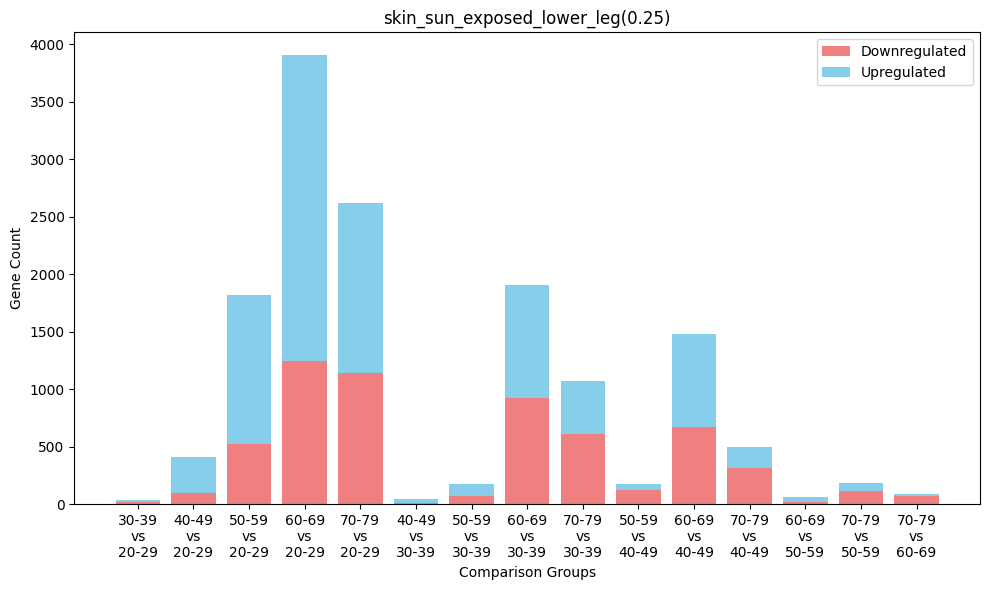

In [10]:
comparison_groups = list(upregulated_genes.keys())
upregulated_counts = [len(upregulated_genes[group]) for group in comparison_groups]
downregulated_counts = [len(downregulated_genes[group]) for group in comparison_groups]
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(comparison_groups, downregulated_counts, color='lightcoral', label='Downregulated')
bars2 = ax.bar(comparison_groups, upregulated_counts, bottom=downregulated_counts, color='skyblue', label='Upregulated')
formatted_labels = [group.replace(' vs ', '\nvs\n') for group in comparison_groups]
ax.set_xticks(comparison_groups)
ax.set_xticklabels(formatted_labels)
ax.set_ylabel('Gene Count')
ax.set_xlabel('Comparison Groups')
ax.set_title('skin_sun_exposed_lower_leg(0.25)')
ax.legend()
plt.tight_layout()
plt.savefig('./outputs/plots/skin_sun_exposed_lower_leg.png')
plt.show()